About Dataset ([kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/emotions?resource=download))
# Introduction

Welcome to the "Emotions" dataset – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

## About the Dataset

Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.

## Key Features

- **text**: A string feature representing the content of the Twitter message.
- **label**: A classification label indicating the primary emotion, with values ranging from 0 to 5.

## Potential Use Cases

- Sentiment Analysis: Uncover the prevailing sentiments in English Twitter messages across various emotions.
- Emotion Classification: Develop models to accurately classify tweets into the six specified emotion categories.
- Textual Analysis: Explore linguistic patterns and expressions associated with different emotional states.

## Sample Data

Here's a glimpse of the dataset with a few examples:

| text                                               | label |
|----------------------------------------------------|-------|
| that was what i felt when i was finally accept…    | 1     |
| i take every day as it comes i'm just focussin…    | 4     |
| i give you plenty of attention even when i fee…    | 0     |

If you find this dataset useful consider giving it a vote! 😊❤️

---


In [17]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization

# Import Natural Language Toolkit (NLTK) components for text processing
import nltk
from nltk.corpus import stopwords  # For removing common stop words from text
nltk.download('stopwords')  # Download the stopwords dataset
nltk.download('punkt')  # Download the Punkt tokenizer models
nltk.download('punkt_tab')  # Download auxiliary Punkt tab models

from nltk.tokenize import word_tokenize  # For tokenizing text into words
import string  # For string operations (e.g., punctuation removal)
import re  # For regular expressions, useful for text cleaning and pattern matching
from bs4 import BeautifulSoup  # For parsing and cleaning HTML content in text
from wordcloud import WordCloud  # For generating word clouds from text data
from nltk.stem import PorterStemmer  # For stemming words to their root form
import emoji  # For handling and analyzing emoji in text
import contractions  # For expanding contractions (e.g., "don't" -> "do not")
from textblob import TextBlob  # For text processing tasks like sentiment analysis and spelling correction



[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/tim/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


loading the data

In [18]:
# Load the emotion_data.csv file into a pandas DataFrame
df = pd.read_csv('emotion_data.csv')  # Reads the CSV file and stores it in a DataFrame

# Remove the first column (Unnamed: 0) which is an unnecessary ID column
df.drop('Unnamed: 0', axis=1, inplace=True)  # Drops the unnamed column (ID) from the DataFrame, 'axis=1' refers to columns

# Rename the 'label' column to 'num_label' to standardize column naming
df.rename(columns={'label': 'num_label'}, inplace=True)  # Renames 'label' to 'num_label'

# Add a 'text_label' column to map numerical labels to corresponding emotion names
# Define a dictionary to map numerical labels to corresponding emotions
label_map = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

# Apply the label_map dictionary to the 'num_label' column to create a new 'text_label' column with emotion names
df['text_label'] = df['num_label'].map(label_map)  # Maps each numeric label to its corresponding emotion name


infos about the data

In [19]:
# Print the first few rows of the DataFrame to get a quick overview of the data
print('dataframe head')
print(df.head())  # Displays the first 5 rows of the DataFrame to show the data structure and content

# Print the shape of the DataFrame, which shows the number of rows and columns
print('\n dataframe shape')
print(df.shape)  # Outputs a tuple representing the dimensions of the DataFrame (number of rows, number of columns)


dataframe head
                                                text  num_label text_label
0      i just feel really helpless and heavy hearted          4       Fear
1  ive enjoyed being able to slouch about relax a...          0    Sadness
2  i gave up my internship with the dmrg and am f...          4       Fear
3                         i dont know i feel so lost          0    Sadness
4  i am a kindergarten teacher and i am thoroughl...          4       Fear

 dataframe shape
(416809, 3)


---

now we clean up the text 

In [20]:
# Define a dictionary of chat word mappings (Acronyms and short forms commonly used in chats)
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

# Utility Functions for Text Preprocessing

def remove_stop_words(tokens):
    """Remove common stop words from the tokenized text."""
    stop_words = set(stopwords.words('english'))  # Get a set of common stop words from NLTK
    return [word for word in tokens if word.lower() not in stop_words]  # Filter out stop words

def remove_punctuation(text):
    """Remove punctuation from the text."""
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_html_tags(text):
    """Remove HTML tags from the text using BeautifulSoup."""
    soup = BeautifulSoup(text, 'html.parser')  # Parse the HTML using BeautifulSoup
    return soup.get_text()  # Extract clean text from HTML

def remove_urls(text):
    """Remove URLs from the text."""
    return re.sub(r'http\S+|www\S+', '', text)  # Use regex to find and remove URLs

def replace_chat_words(text):
    """Replace common chat acronyms/short forms with their full form."""
    words = text.split()  # Split the text into words
    return ' '.join([chat_words.get(word.upper(), word) for word in words])  # Replace using dictionary, if present

def remove_emojis(text):
    """Remove emojis from the text."""
    return emoji.demojize(text)  # Use the emoji library to convert emojis to text representation

def expand_contractions_safe(text):
    """Expand contractions in the text, handling both cases and potential errors."""
    return contractions.fix(text)  # Expand contractions using the contractions library

def remove_special_symbols(text):
    """Remove special symbols like @mentions and hashtags."""
    return re.sub(r'[@#]\w+', '', text)  # Use regex to remove @mentions and hashtags

def preprocess_text(text):
    """Complete preprocessing pipeline for text data."""
    text = text.lower()  # Normalize text to lowercase
    text = remove_html_tags(text)  # Remove HTML tags
    text = remove_urls(text)  # Remove URLs
    text = expand_contractions_safe(text)  # Expand contractions (e.g., "I'm" -> "I am")
    text = remove_punctuation(text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text into individual words
    tokens = remove_stop_words(tokens)  # Remove stop words
    text = ' '.join(tokens)  # Join tokens back into a single string
    text = replace_chat_words(text)  # Replace chat words (acronyms) with full forms
    text = remove_emojis(text)  # Remove emojis from the text
    text = remove_special_symbols(text)  # Remove special symbols like @mentions and hashtags
    return text.strip()  # Remove extra whitespace and return the cleaned text

def stem_text(text):
    """Stem the words in the text."""
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in text.split()])


# Apply the preprocessing pipeline to the 'text' column in the DataFrame
df['text_cleaned'] = df['text'].apply(preprocess_text)

df['text_stemmed'] = df['text_cleaned'].apply(stem_text)

df['text_sentiment'] = df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Optionally, save the cleaned data to a CSV file
df.to_csv('cleaned_emotion_data.csv', index=False)


In [21]:
# Load the cleaned data from a CSV file
df = pd.read_csv('cleaned_emotion_data.csv')

# Make sure the 'text' and 'text_stemmed' columns are treated as strings (char array (wort))
df['text'] = df['text'].astype(str)
df['text_stemmed'] = df['text_stemmed'].astype(str)

# Calculate the length of each text in the 'text_stemmed' column and store it in a new column 'text_length_stemmed'
df['text_length_stemmed'] = df['text_stemmed'].apply(len)

# Calculate the length of each text in the 'text' column and store it in a new column 'text_length'
df['text_length'] = df['text'].apply(len)

---

Now we take closer look into the data

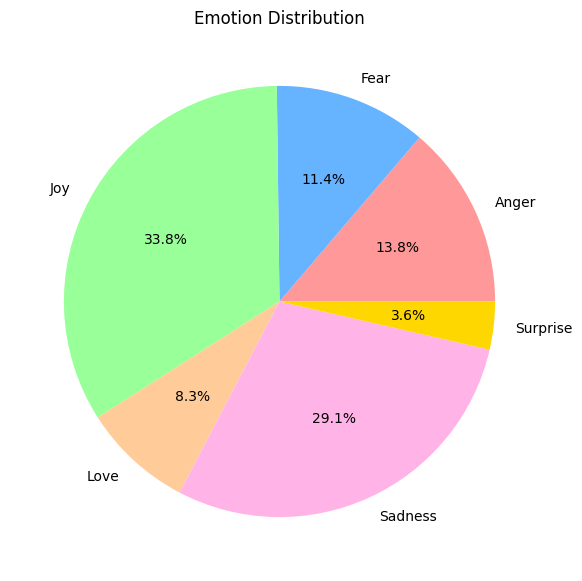

In [22]:
# Group the dataframe by 'text_label' and count the number of occurrences for each emotion
df_grouped = df.groupby('text_label').count()

# Plot a pie chart showing the distribution of 'num_label' for each emotion
df_grouped['num_label'].plot.pie(
    autopct='%1.1f%%',  # Display the percentage on the pie slices, formatted to one decimal place
    figsize=(7, 7),  # Set the size of the pie chart (optional, adjust if needed)
    colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFB3E6', '#FFD700']  # Color palette
)

# Add a title to the pie chart
plt.title('Emotion Distribution')

# Remove the ylabel (it’s not needed for pie charts)
plt.ylabel('')

# Display the pie chart
plt.show()



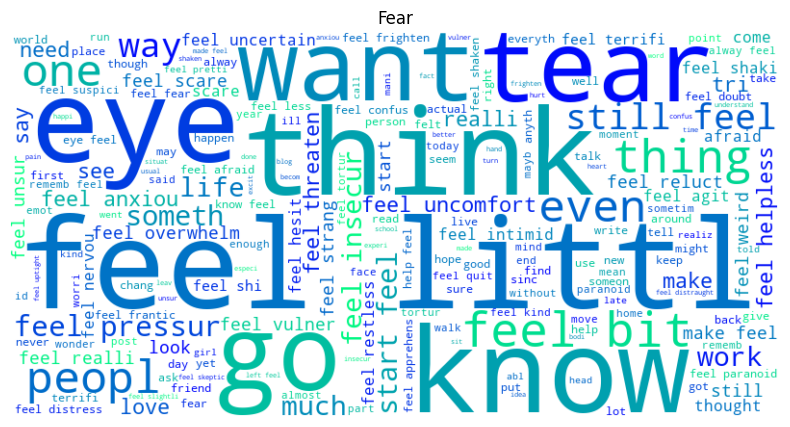

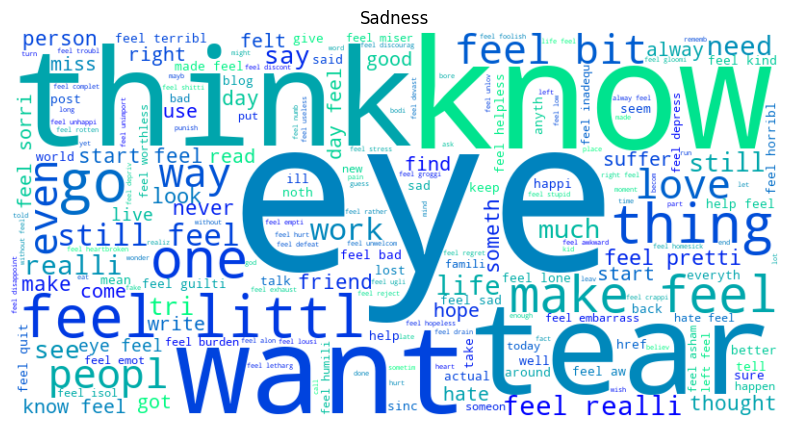

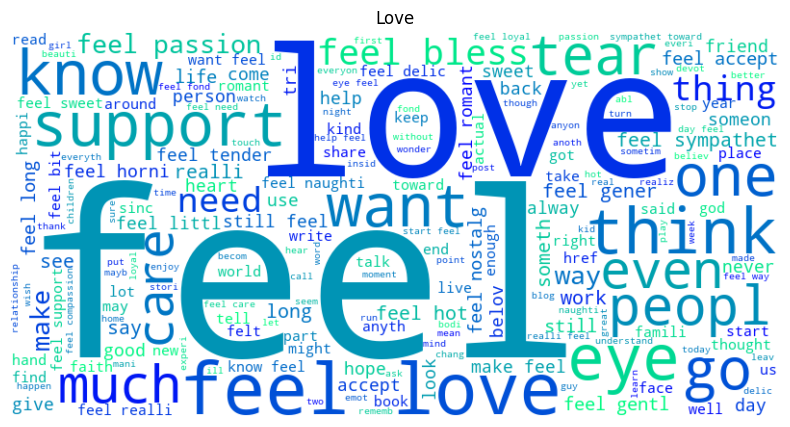

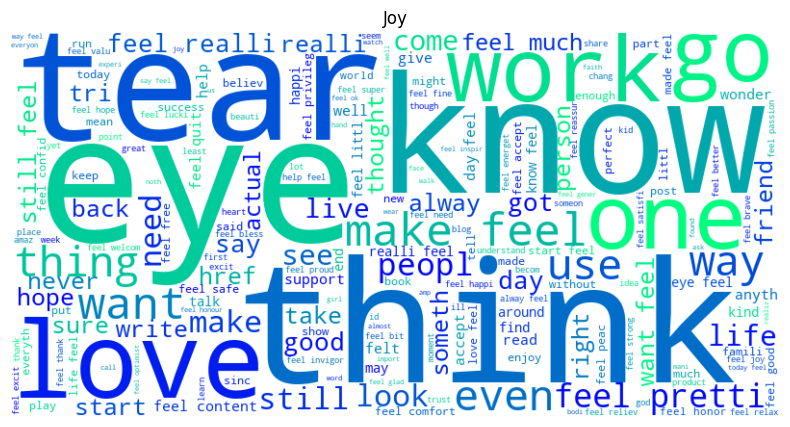

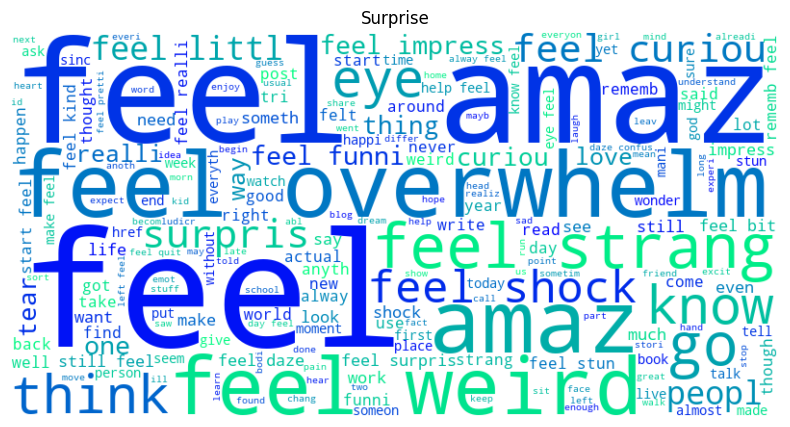

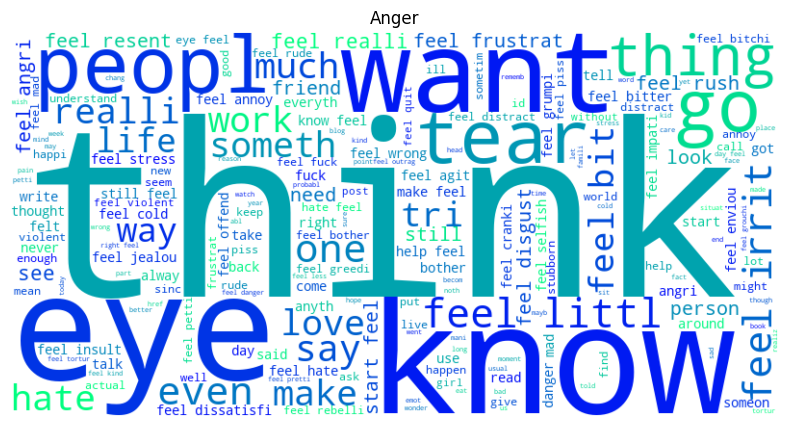

In [23]:
# Get all unique emotion labels from the 'text_label' column
emotions = df['text_label'].unique()

# Loop over each emotion to create a word cloud for its associated text data
for emotion in emotions:
    # Filter the dataframe to get all text related to the current emotion and join them into one string
    text = ' '.join(df[df['text_label'] == emotion]['text_stemmed'])
    
    # Generate the word cloud using the combined text for the current emotion
    wordcloud = WordCloud(
        width=800,  # Set the width of the word cloud image
        height=400,  # Set the height of the word cloud image
        background_color='white',  # Set the background color of the word cloud
        colormap='winter'  # Choose a colormap for the word cloud (you can try others like 'plasma', 'inferno', etc.)
    ).generate(text)  # Generate the word cloud from the given text

    # Create a new figure with a specific size to display the word cloud
    plt.figure(figsize=(10, 5))

    # Display the word cloud image
    plt.imshow(wordcloud, interpolation='bilinear')

    # Remove the axis (it's not needed for word clouds)
    plt.axis('off')

    # Set the title of the plot to the current emotion label
    plt.title(emotion)

    # Show the plot (word cloud image) for the current emotion
    plt.show()



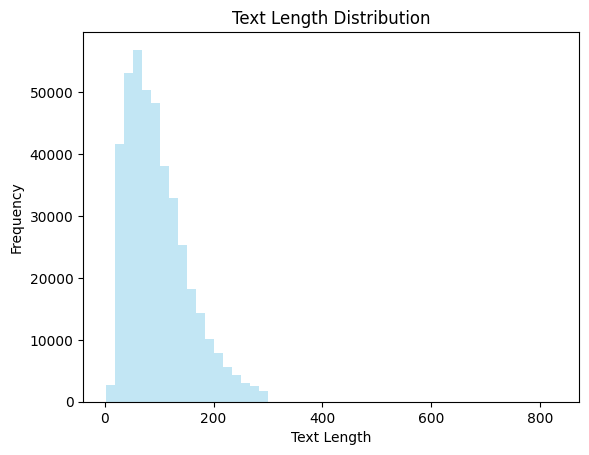

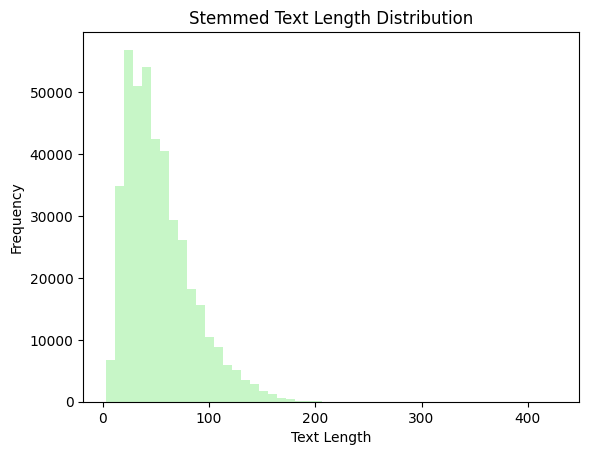

In [24]:
# Plot the distribution of text lengths for the original text data
# 'text_length' is assumed to be a column containing the length of the original text
df['text_length'].plot.hist(
    bins=50,  # Set the number of bins for the histogram (more bins give more detailed distribution)
    alpha=0.5,  # Set transparency for the bars in the histogram (0 is fully transparent, 1 is fully opaque)
    color='skyblue'  # Customize the color of the bars
)

# Set the title of the plot to indicate it's for the original text length distribution
plt.title('Text Length Distribution')

# Label the x-axis (Text Length)
plt.xlabel('Text Length')

# Label the y-axis (Frequency of texts with this length)
plt.ylabel('Frequency')

# Display the plot
plt.show()

# Plot the distribution of stemmed text lengths for the stemmed text data
# 'text_length_stemmed' is assumed to be a column containing the length of the stemmed text
df['text_length_stemmed'].plot.hist(
    bins=50,  # Set the number of bins for the histogram
    alpha=0.5,  # Set transparency of the bars
    color='lightgreen'  # Customize the color of the bars
)

# Set the title of the plot to indicate it's for the stemmed text length distribution
plt.title('Stemmed Text Length Distribution')

# Label the x-axis (Stemmed Text Length)
plt.xlabel('Text Length')

# Label the y-axis (Frequency of stemmed texts with this length)
plt.ylabel('Frequency')

# Display the plot
plt.show()


--- 

now we come to the good part


Accuracy: 0.8778820085890454
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     24238
           1       0.89      0.92      0.90     28214
           2       0.79      0.69      0.73      6911
           3       0.88      0.88      0.88     11463
           4       0.84      0.83      0.83      9542
           5       0.74      0.70      0.72      2994

    accuracy                           0.88     83362
   macro avg       0.84      0.82      0.83     83362
weighted avg       0.88      0.88      0.88     83362



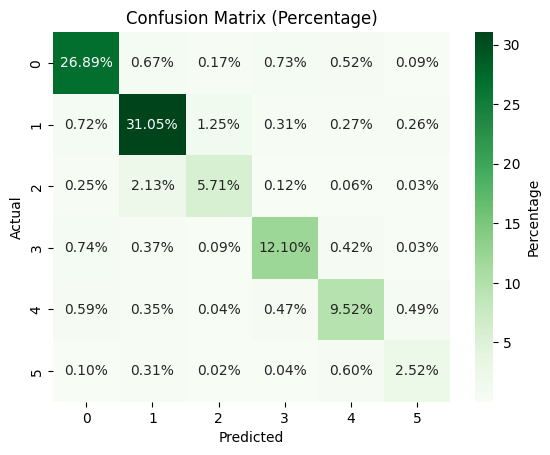

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Features (X) and Labels (y)
X = df['text_stemmed']  # Features: the stemmed text data
y = df['num_label']  # Labels: the numerical labels for emotions

# Stratified Train-Test Split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Splitting the data into train and test sets while maintaining class distribution

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Using TF-IDF for feature extraction, limiting to top 5000 features
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = tfidf.transform(X_test)  # Transform the test data (without fitting)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)  # Logistic regression model (increased max_iter in case of convergence issues)
model.fit(X_train_tfidf, y_train)  # Train the model on the training data

# Predictions on test set
y_pred = model.predict(X_test_tfidf)  # Predict the labels for the test set

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
print(f"Accuracy: {accuracy}")  # Print the accuracy
print("Classification Report:")  # Print classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix from true labels and predicted labels

# Normalize by the total number of entries and convert to percentage
cm_percentage = cm / cm.sum() * 100  # Normalize the confusion matrix values to percentages

# Prepare the annotation with percentage values formatted to two decimal places
annot = np.array([["{:.2f}%".format(val) for val in row] for row in cm_percentage])  # Format the values as percentages

# Heatmap visualization
sns.heatmap(cm_percentage,  # Create the heatmap using the confusion matrix percentages
            annot=annot,  # Display the formatted percentage values as annotations
            fmt="",  # Set the format to empty as the annotations are pre-formatted
            cmap='Greens',  # Use the 'Greens' color map for the heatmap
            cbar_kws={'label': 'Percentage'})  # Add color bar with label 'Percentage'
plt.title("Confusion Matrix (Percentage)")  # Set the title of the heatmap
plt.ylabel('Actual')  # Set the label for the y-axis (Actual labels)
plt.xlabel('Predicted')  # Set the label for the x-axis (Predicted labels)
plt.show()  # Display the heatmap


/var/folders/f7/y181b1950cb40n21f21_yfnm0000gn/T/ipykernel_1650/3710023988.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('num_label').apply(lambda x: x.sample(min_samples)).reset_index(drop=True)


Accuracy on full dataset: 0.8692662586460466
Classification Report on full dataset:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91    121187
           1       0.95      0.84      0.89    141067
           2       0.66      0.90      0.76     34554
           3       0.85      0.91      0.88     57317
           4       0.84      0.84      0.84     47712
           5       0.62      0.97      0.75     14972

    accuracy                           0.87    416809
   macro avg       0.81      0.89      0.84    416809
weighted avg       0.89      0.87      0.87    416809



/Users/tim/Library/Caches/pypoetry/virtualenvs/mba-emotions-analysis-50WdhfN2-py3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


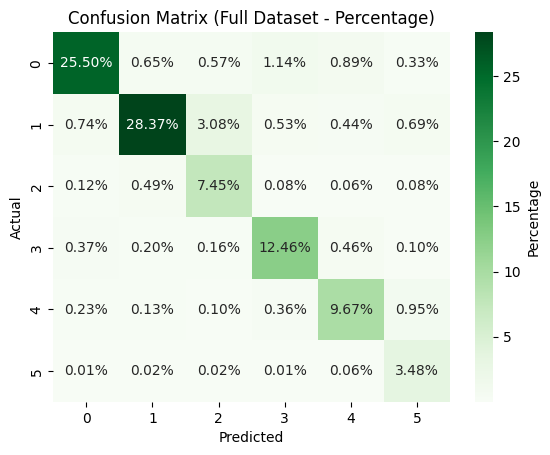

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Find the class with the least samples
min_samples = df['num_label'].value_counts().min()  # Get the minimum number of samples in any class

# Sample the data to have the same number of samples for each class (balance the data)
df_balanced = df.groupby('num_label').apply(lambda x: x.sample(min_samples)).reset_index(drop=True)  
# Group by 'num_label' and sample the minimum number of samples for each class, ensuring a balanced dataset

# Features (X) and Labels (y) for balanced training data
X_balanced = df_balanced['text_stemmed']  # Features for the balanced dataset (stemmed text)
y_balanced = df_balanced['num_label']  # Labels for the balanced dataset (numerical labels)

# Features (X) and Labels (y) for the entire dataset (for testing later)
X_full = df['text_stemmed']  # Features for the full dataset
y_full = df['num_label']  # Labels for the full dataset

# Stratified Train-Test Split on the balanced data
X_train, X_balanced_test, y_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)  
# Split the balanced dataset into training and testing sets while preserving class distribution

# TF-IDF Vectorization (fit only on training data)
tfidf = TfidfVectorizer(max_features=5000)  # Initialize TF-IDF vectorizer with a maximum of 5000 features
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform the training data into TF-IDF vectors

# Transform the full dataset (for testing)
X_full_tfidf = tfidf.transform(X_full)  # Apply the same transformation to the full dataset (without fitting)

# Logistic Regression Model
model = LogisticRegression()  # Initialize logistic regression model
model.fit(X_train_tfidf, y_train)  # Fit the model to the training data

# Predictions on the full dataset
y_full_pred = model.predict(X_full_tfidf)  # Predict the labels for the full dataset using the trained model

# Model Evaluation on the full dataset
accuracy_full = accuracy_score(y_full, y_full_pred)  # Calculate the accuracy on the full dataset
print(f"Accuracy on full dataset: {accuracy_full}")  # Print the accuracy of the model
print("Classification Report on full dataset:")  # Print the detailed classification report
print(classification_report(y_full, y_full_pred))

# Confusion Matrix on the full dataset
cm_full = confusion_matrix(y_full, y_full_pred)  # Generate the confusion matrix for the predicted vs actual labels

# Convert to percentages
cm_full_percentage = cm_full / cm_full.sum() * 100  # Normalize the confusion matrix values to percentages by dividing by the total sum

# Heatmap visualization with percentage annotations
sns.heatmap(cm_full_percentage,  # Create a heatmap of the confusion matrix (percentage values)
            annot= np.array([["{:.2f}%".format(val) for val in row] for row in cm_full_percentage]),  # Annotate each cell with its percentage value formatted to two decimal places
            fmt="",  # No additional formatting is required since we are using pre-formatted values
            cmap='Greens',  # Set the color map for the heatmap to 'Greens'
            cbar_kws={'label': 'Percentage'})  # Add a color bar with a label 'Percentage'
plt.title("Confusion Matrix (Full Dataset - Percentage)")  # Set the title for the heatmap
plt.ylabel('Actual')  # Set the label for the y-axis (Actual labels)
plt.xlabel('Predicted')  # Set the label for the x-axis (Predicted labels)
plt.show()  # Display the heatmap plot
